In [1]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

### Load Bike Shot images

**!!!Make sure that the BikeShot images are saved in the same working directory as this notebook!!!**

In [12]:
def load_image(image_path):
    '''Load image with Pillow'''
    im = Image.open(image_path)
    return im

In [13]:
# Load Images
image_files = ['BikeShot1.jpg', 'BikeShot2.jpg', 'BikeShot3.jpg', 'BikeShot4.jpq.png']
images = [load_image(f) for f in image_files]

### Display Unprocessed Images

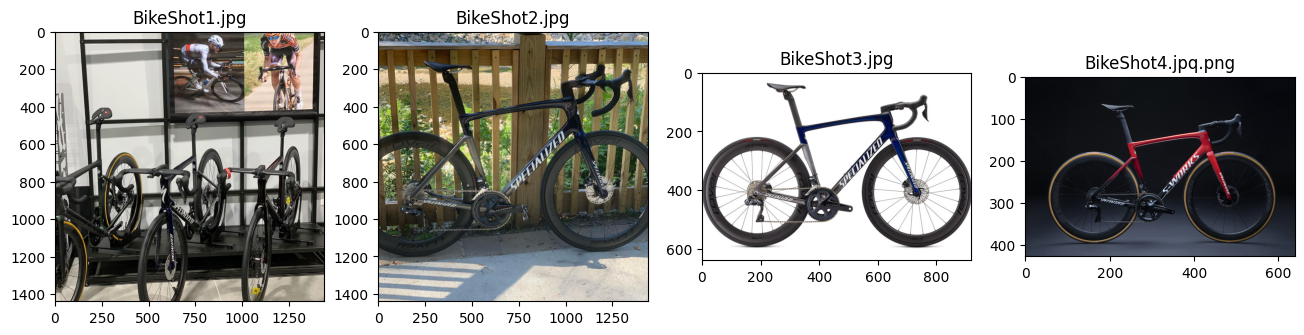

In [14]:
fig, axs = plt.subplots(1, 4, figsize=(16,16))
for i, image in enumerate(images):
    axs[i].set_title(image_files[i])
    axs[i].imshow(image)

### Process images

In [15]:
def resize_and_normalize(image):
    '''Process images by resizing, scaling, and then normalizing'''
    
    mean = [0.485, 0.456, 0.406]  
    std  = [0.229, 0.224, 0.225]
    resize_height, resize_width = 416, 416

    #######################
    # Step 1: Resize image
    #######################
    resized_image = image.resize((resize_height, resize_width))

    # Convert PIL Image to NumPy
    resized_image = np.array(resized_image)

    # BikeShot4.jpg has 4 channels, this is for removing the 4th channel
    if resized_image.shape[-1] == 4:
        resized_image = resized_image[:, :, :3]

    ######################################
    # Step 2: Scale image between 0 and 1
    ######################################
    scaled_image = resized_image / 255

    #############################################
    # Step 3: Normalize image using mean and std
    #############################################
    normalized_image = (scaled_image - mean) / std

    # Clip pixel values that are above 1
    return np.clip(normalized_image, 0, 1)

In [16]:
processed_images = [resize_and_normalize(image) for image in images]

### Display Processed Images

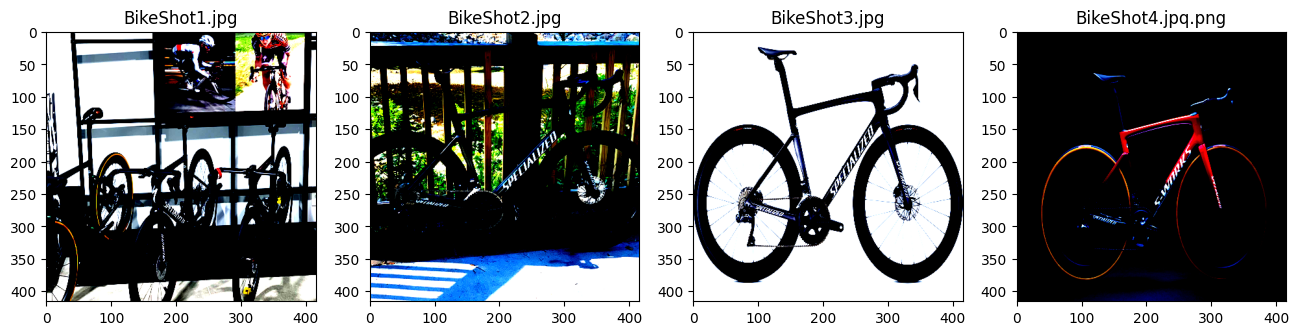

In [17]:
# Display images
fig, axs = plt.subplots(1, 4, figsize=(16,16))
for i, image in enumerate(processed_images):
    axs[i].set_title(image_files[i])
    axs[i].imshow(image)

### Display histograms of mean pixel values for processed image

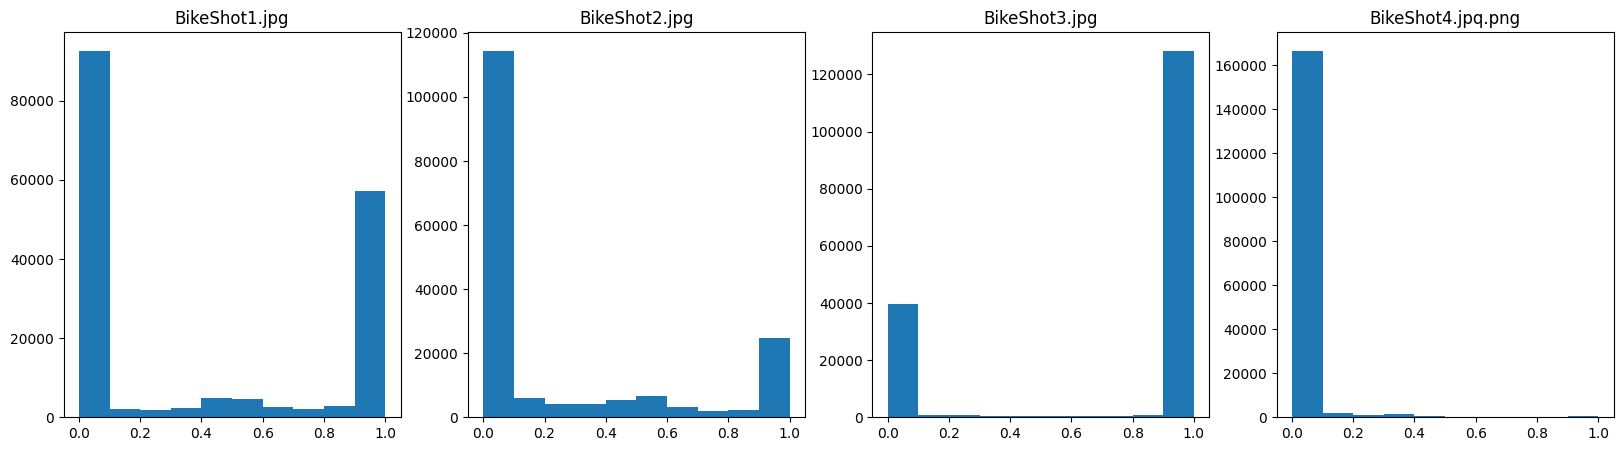

In [32]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

for i, image in enumerate(processed_images):
    vals =  image.mean(axis=2).flatten()
    axs[i].hist(vals)
    axs[i].set_title(image_files[i])